## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df_merged = pd.merge(study_results, mouse_metadata, on = ['Mouse ID'], how='left')
df_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_mean = df_merged.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [3]:
drug_median = df_merged.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [4]:
drug_variance = df_merged.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [5]:
drug_stdDev = df_merged.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_stdDev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [6]:
drug_SEM = df_merged.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
drug_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

## Bar plots

Text(0, 0.5, 'Number of Data points')

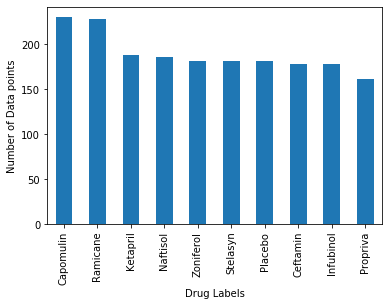

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

drug_vCounts = df_merged["Drug Regimen"].value_counts()

drug_vCounts.plot(kind = "bar")
plt.xlabel("Drug Labels")
plt.ylabel("Number of Data points")
##plt.ticks

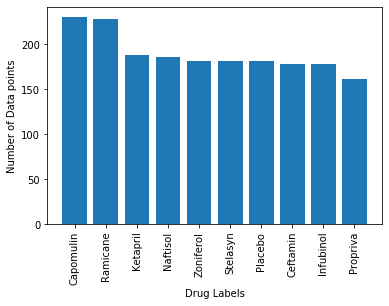

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.bar(drug_vCounts.index.values, drug_vCounts.values)
plt.xticks(rotation = 90)
plt.xlabel("Drug Labels")
plt.ylabel("Number of Data points")
plt.show()

## Pie plots

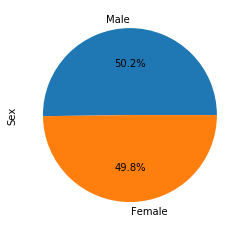

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_genCounts = mouse_metadata["Sex"].value_counts()
mouse_genCounts.plot(kind = "pie", autopct='%1.1f%%')
plt.show()


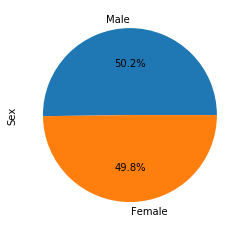

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_genCounts.values, labels = mouse_genCounts.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# max_tumor = drug_SEM.groupby(["Mouse ID"]).max()
# max_tumor =  max_tumor.reset_index();
# merged
mouse_success = df_merged.groupby("Mouse ID").max()
mouse_success = mouse_success.reset_index()
mouse_success

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,45.000000,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [13]:
mouse_merge = mouse_success[["Mouse ID", "Timepoint"]].merge(df_merged, on = ["Mouse ID", "Timepoint"], how = "left")
mouse_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [25]:
#Value 1
Capomulin = mouse_merge.loc[mouse_merge["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
Capomulin

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [52]:
capomulin_df = pd.DataFrame(Capomulin)
capo_Quartile_df = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
capo_lowerq = capo_Quartile_df[.25]
capo_upperq = capo_Quartile_df[.75]
capo_iqr = capo_upperq-capo_lowerq

In [49]:
print(f"The lower quartile of Capomulin is: {capo_lowerq}")
print(f"The upper quartile of Capomulin is: {capo_upperq}")
print(f"The interquartile range of Capomulin is: {capo_iqr}")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004


In [18]:
#Value 2
Ramicane = mouse_merge.loc[mouse_merge["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
Ramicane

6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
77     33.562402
78     36.374510
92     31.560470
94     36.134852
97     22.050126
120    30.564625
127    31.095335
158    45.220869
159    36.561652
167    37.225650
169    43.419381
178    30.276232
191    40.667713
218    43.166373
236    44.183451
245    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [53]:
ramicane_df = pd.DataFrame(Ramicane)
rami_Quartile_df = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
rami_lowerq = rami_Quartile_df[.25]
rami_upperq = rami_Quartile_df[.75]
rami_iqr = rami_upperq-rami_lowerq

In [55]:
print(f"The lower quartile of Ramicane is: {rami_lowerq}")
print(f"The upper quartile of Ramicane is: {rami_upperq}")
print(f"The interquartile range of Ramicane is: {rami_iqr}")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998


In [19]:
#val 3
Infubinol = mouse_merge.loc[mouse_merge["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
Infubinol

0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.226731
31     36.321346
41     60.969711
50     62.435404
56     60.918767
79     67.289621
98     66.196912
102    62.117279
124    47.010364
130    60.165180
142    55.629428
143    45.699331
154    54.656549
171    55.650681
198    46.250112
201    54.048608
203    51.542431
212    50.005138
217    58.268442
234    67.685569
246    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [57]:
infubinol_df = pd.DataFrame(Infubinol)
infu_Quartile_df = infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
infu_lowerq = infu_Quartile_df[.25]
infu_upperq = infu_Quartile_df[.75]
infu_iqr = infu_upperq-infu_lowerq

In [58]:
print(f"The lower quartile of Infubinol is: {infu_lowerq}")
print(f"The upper quartile of Infubinol is: {infu_upperq}")
print(f"The interquartile range of Infubinol is: {infu_iqr}")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003


In [20]:
##val 4
Ceftamin = mouse_merge.loc[mouse_merge["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
Ceftamin

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [60]:
ceftamin_df = pd.DataFrame(Ceftamin)
cefta_Quartile_df = ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cefta_lowerq = cefta_Quartile_df[.25]
cefta_upperq = cefta_Quartile_df[.75]
cefta_iqr = cefta_upperq-cefta_lowerq

In [61]:
print(f"The lower quartile of Ceftamin is: {cefta_lowerq}")
print(f"The upper quartile of Ceftamin is: {cefta_upperq}")
print(f"The interquartile range of Ceftamin is: {cefta_iqr}")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997


{'whiskers': [<matplotlib.lines.Line2D at 0x2dbc2f93278>,
 'caps': [<matplotlib.lines.Line2D at 0x2dbc3001e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2dbc1b6f358>,
 'medians': [<matplotlib.lines.Line2D at 0x2dbc2c3d828>,
 'fliers': [<matplotlib.lines.Line2D at 0x2dbc2c3d1d0>,
 'means': [<matplotlib.lines.Line2D at 0x2dbc2c3d128>,
  <matplotlib.lines.Line2D at 0x2dbc3625da0>]}

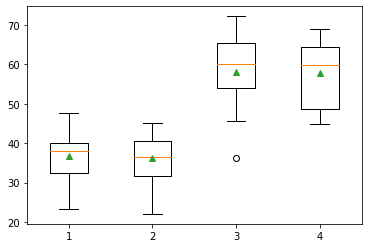

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_data = [Capomulin, Ramicane, Infubinol, Ceftamin]
drug_data = [Capomulin, Ramicane, Infubinol, Ceftamin]
fig1, ax1 = plt.subplots()
ax1.boxplot(drug_data, showmeans = True)

## Line and scatter plots

In [68]:
capo_Full_df = df_merged.loc[df_merged['Drug Regimen'] == 'Capomulin']
capo_Full_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


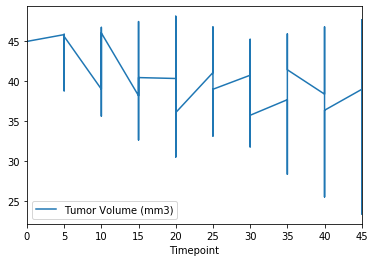

In [71]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capo_Mouse_df = capo_Full_df.groupby("Mouse ID").get_group("s185")
capo_Mouse_df
capo_Full_df.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)" )

#group by mouse ID then Get_group to get one mouse
##.get

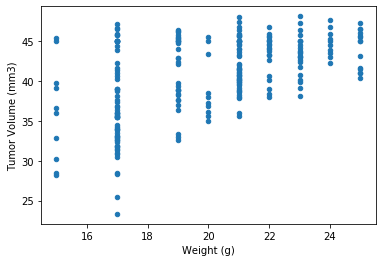

In [73]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capo_Full_df.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)" )

In [76]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
capo_Full_wieght = capo_Full_df("Wieght (g)")
capo_Full_TvolMean = capo_Full_df(capo_Full_df("Tumor Volume (mm3)").mean()
plt.scatter(capo_Full_wieght, capo_Full_TvolMean)
plt.plot(X, Y_pred, color='red')
plt.show()

SyntaxError: invalid syntax (<ipython-input-76-157811b91f9c>, line 4)